In [1]:
def coherence(arr, w):
    n = len(arr[0])
    p = [0 for i in range(n)]
    for i in range(n):
        p[i] = 0
        for j in range(n):
            p[i] += arr[i][j] * w[j]
    for i in range(n):
        p[i] /= w[i]
    lam = 0
    for i in range(n):
        lam += p[i]
    lam /= n
    ci = (lam - n) / (n - 1)
    ri = 1.98 * (n - 2) / n
    cr = ci / ri
    return cr

def MAI(arr):
    n = len(arr[0])
    for i in range(n):
        s = 0
        for j in range(n):
            s += arr[j][i]
        for j in range(n):
            arr[j][i] /= s
    res = [0 for i in range(n)]
    for i in range(n):
        s = 0
        for j in range(n):
            s += arr[i][j]
        s /= n
        res[i] = s
    coh = coherence(arr, res)
    if coh > 0.1:
        return [-1]
    return res
    

In [2]:
a = [[1, 2, 1/3, 1/5, 1/7], [1/2, 1, 1/6, 1/9, 1/9], [3, 6, 1, 1/2, 1/2], [5, 9, 2, 1, 1/2], [7, 9, 2, 2, 1]]
sz = len(a)
for i in range(sz):
    print(a[i])
res = [0 for i in range(sz)]
res = MAI(a)
print(res)

[1, 2, 0.3333333333333333, 0.2, 0.14285714285714285]
[0.5, 1, 0.16666666666666666, 0.1111111111111111, 0.1111111111111111]
[3, 6, 1, 0.5, 0.5]
[5, 9, 2, 1, 0.5]
[7, 9, 2, 2, 1]
[0.06222892221742467, 0.03521867824828445, 0.18777698141020935, 0.29684433129388577, 0.41793108683019575]


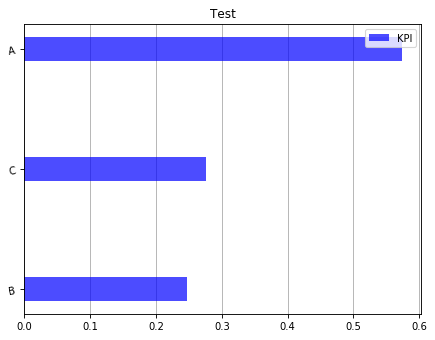

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

dpi = 80

def show(input_filename, weights):

    df = pd.read_csv(input_filename)
    columns = []
    for i in df:
        columns.append(i)
    n = len(columns)

    #data = [['Kharkiv', 8652], ['Kiev', 9124], ['Odessa', 7592]]
    data = []
    for i in range(len(df[columns[0]])):
        kpi = 0
        for j in range(1, n):
            kpi += weights[j-1] * df[columns[j]][i]
        data.append([df[columns[0]][i], kpi])

    data = sorted(data, key=lambda a: a[1])

    data_names = []
    data_values = []
    for i in data:
        data_names.append(i[0])
        data_values.append(i[1])

    mpl.rcParams.update({'font.size': 9})
    _, ax = plt.subplots(dpi = dpi, figsize = (512 / dpi, 384 / dpi), num = 'Test')
    ax.xaxis.grid(True, zorder = 1)
    ax.set_title('Test')
    xs = range(len(data_values))

    plt.barh([x for x in xs], data_values,
            height = 0.2, color = 'blue', alpha = 0.7, label = 'KPI',
            zorder = 2)
    plt.yticks(xs, data_names, rotation = 10)

    plt.legend(loc='upper right')
    plt.savefig('result.png')
    plt.show()

show('test.csv', [0.1, 0.1, 0.1, 0.2, 0.2, 0.4])